<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230126.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [1]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta
import os
import re

from functools import reduce
from collections import defaultdict 

from scipy import stats

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'mall_customers.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'online_retail.xlsx',
 'sales.csv',
 'ab_experiment.csv',
 'match_result_test.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'sample-sales-data.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'test.csv',
 'online_retail_II.xlsx',
 'groceries.csv',
 'ecommerce-data.csv',
 '1_orders_dataset.csv',
 '1_order_payments_dataset.csv',
 'mock_sales_data.csv',
 'bz_data_analyis.csv',
 'app_wau.csv',
 'sales_vs_discount.csv',
 'cookie_cats.csv',
 'sales_data_with_stores.csv',
 '1_customers_dataset.csv',
 'lead_conversion.csv',
 'scanner_data.csv',
 'sample_data']

In [41]:
df = pd.read_csv('cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [4]:
cnt = pd.melt(df, id_vars = ['userid', 'version', 'sum_gamerounds'], var_name='retention', value_name='result')
cnt = cnt.groupby(['version','retention','result'])['userid'].count().reset_index().rename(columns = {'userid':'cnt'})
cnt = cnt[cnt['result'] == True]
cnt.head()

,version,retention,result,cnt
1,gate_30,retention_1,True,20034
3,gate_30,retention_7,True,8502
5,gate_40,retention_1,True,20119
7,gate_40,retention_7,True,8279


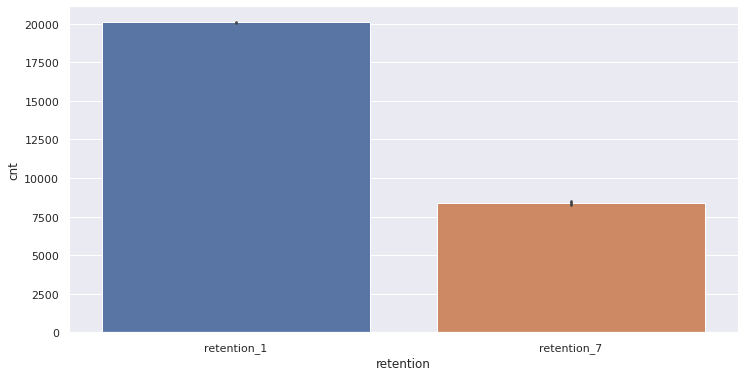

In [6]:
sns.set(rc = {'figure.figsize':(12, 6)})
sns.barplot(data = cnt, x = 'retention', y = 'cnt')
plt.show()

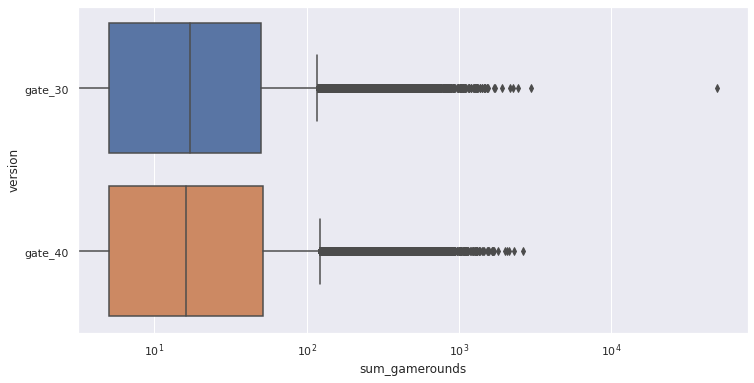

In [10]:
sns.set(rc = {'figure.figsize':(12,6)})
ax = sns.boxplot(data = df, x = 'sum_gamerounds', y = 'version')
ax.set_xscale('log')
plt.show()

In [11]:
df = df[df['sum_gamerounds'] < 10e4]

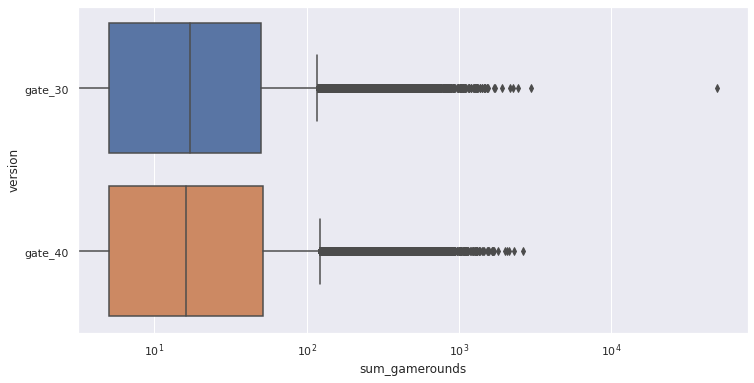

In [12]:
sns.set(rc = {'figure.figsize':(12,6)})
ax = sns.boxplot(data = df, x = 'sum_gamerounds', y = 'version')
ax.set_xscale('log')
plt.show()

In [18]:
df.groupby(['version'])['sum_gamerounds'].agg(['sum','mean','min','max']).reset_index()

,version,sum,mean,min,max
0,gate_30,2344795,52.456264,0,49854
1,gate_40,2333530,51.298776,0,2640


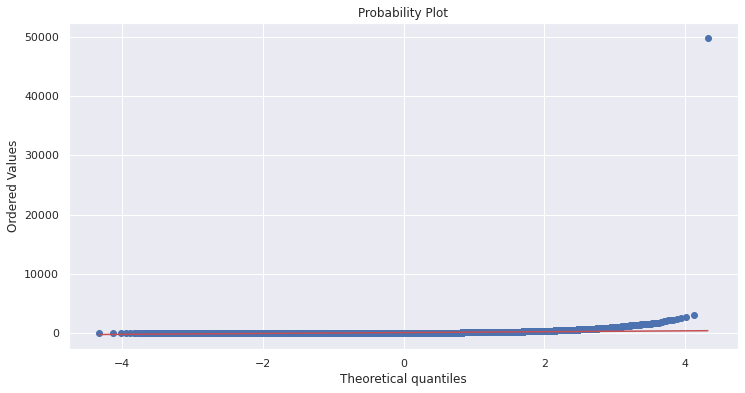

In [20]:
stats.probplot(df['sum_gamerounds'], dist = 'norm', plot = plt)
plt.show()

In [35]:
from scipy import stats

In [36]:
stats, p = stats.normaltest(df['sum_gamerounds'])
print(str(stats) + '\n' + str(p))

431864.6551542215
0.0


In [33]:
stats, p = stats.chisquare(df['sum_gamerounds'])
print(str(stats) + '\n' + str(p))

AttributeError: ignored

In [46]:
n = 1000
boots = pd.DataFrame([df.sample(frac = .1, replace = True).groupby(['version'])['sum_gamerounds'].mean()  for i in range(n)])
boots.head()

version,gate_30,gate_40
sum_gamerounds,51.960978,53.889474
sum_gamerounds,52.729330,51.551800
sum_gamerounds,48.710093,50.177778
sum_gamerounds,49.941348,51.182097
sum_gamerounds,51.990545,50.743500


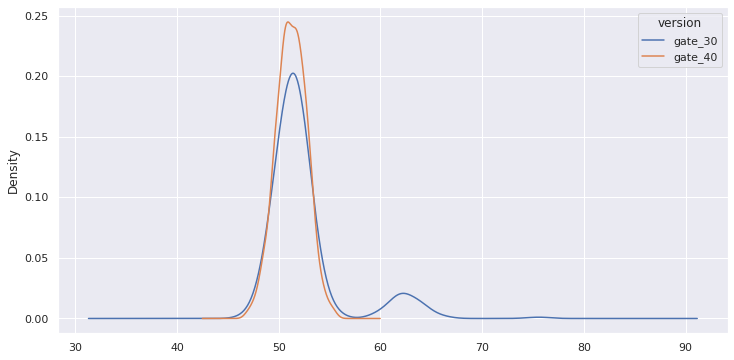

In [47]:
sns.set(rc = {'figure.figsize':(12,6)})
boots.plot.kde()

In [49]:
diff = boots['gate_30'] - boots['gate_40']
len(diff[diff > 0])/n

0.57

# Iterators

In [50]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [51]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}